# Initial EDA of the image data



## Loading Data

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import matplotlib.image as img

import cv2

import os

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Any results you write to the current directory are saved as output.

In [3]:
sns.set_style("darkgrid") # darkgrid
sns.set_context("notebook") # paper, notebook, talk, and poster


## Loading the data

In [7]:
%pwd

'/Users/ryan/neue_fische/human-protein-atlas-image-classification/notebooks'

In [8]:
# first load the training labels
train_labels = pd.read_csv("../data/train.csv")
train_labels.head()


,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [9]:
# courtesy of https://www.kaggle.com/code/allunia/protein-atlas-exploration-and-baseline
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row



## One-hot encoding the train targets

In [13]:
# add column for each protein and set to 0
for key in label_names.keys():
    train_labels[label_names[key]] = 0
# for each target value, set corresponding column = 1
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
train_labels

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31067,ffed4430-bbac-11e8-b2ba-ac1f6b6435d0,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31068,fff0a998-bbae-11e8-b2ba-ac1f6b6435d0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31069,fff189d8-bbab-11e8-b2ba-ac1f6b6435d0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31070,fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0,25 2 21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Some initial findings in the Train data set

In [14]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31072 entries, 0 to 31071
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Id                             31072 non-null  object
 1   Target                         31072 non-null  object
 2   Nucleoplasm                    31072 non-null  int64 
 3   Nuclear membrane               31072 non-null  int64 
 4   Nucleoli                       31072 non-null  int64 
 5   Nucleoli fibrillar center      31072 non-null  int64 
 6   Nuclear speckles               31072 non-null  int64 
 7   Nuclear bodies                 31072 non-null  int64 
 8   Endoplasmic reticulum          31072 non-null  int64 
 9   Golgi apparatus                31072 non-null  int64 
 10  Peroxisomes                    31072 non-null  int64 
 11  Endosomes                      31072 non-null  int64 
 12  Lysosomes                      31072 non-null  int64 
 13  I

In [15]:
train_labels.describe()

,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,Peroxisomes,Endosomes,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
count,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,...,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000,31072.000000
mean,0.414682,0.040358,0.116536,0.050238,0.059797,0.080877,0.032441,0.090821,0.001706,0.001448,...,0.029029,0.047696,0.005536,0.121556,0.025811,0.095424,0.010363,0.264804,0.010556,0.000354
std,0.492675,0.196800,0.320871,0.218440,0.237113,0.272650,0.177171,0.287359,0.041266,0.038029,...,0.167891,0.213125,0.074196,0.326778,0.158574,0.293804,0.101272,0.441236,0.102201,0.018812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Distribution of the proteins

In [56]:
np.sum(target_counts)

50782

In [58]:
100*np.sum(target_counts[0:2])/np.sum(target_counts), target_counts[0]/31072

(41.57575518884644, 0.41468202883625127)

<AxesSubplot:>

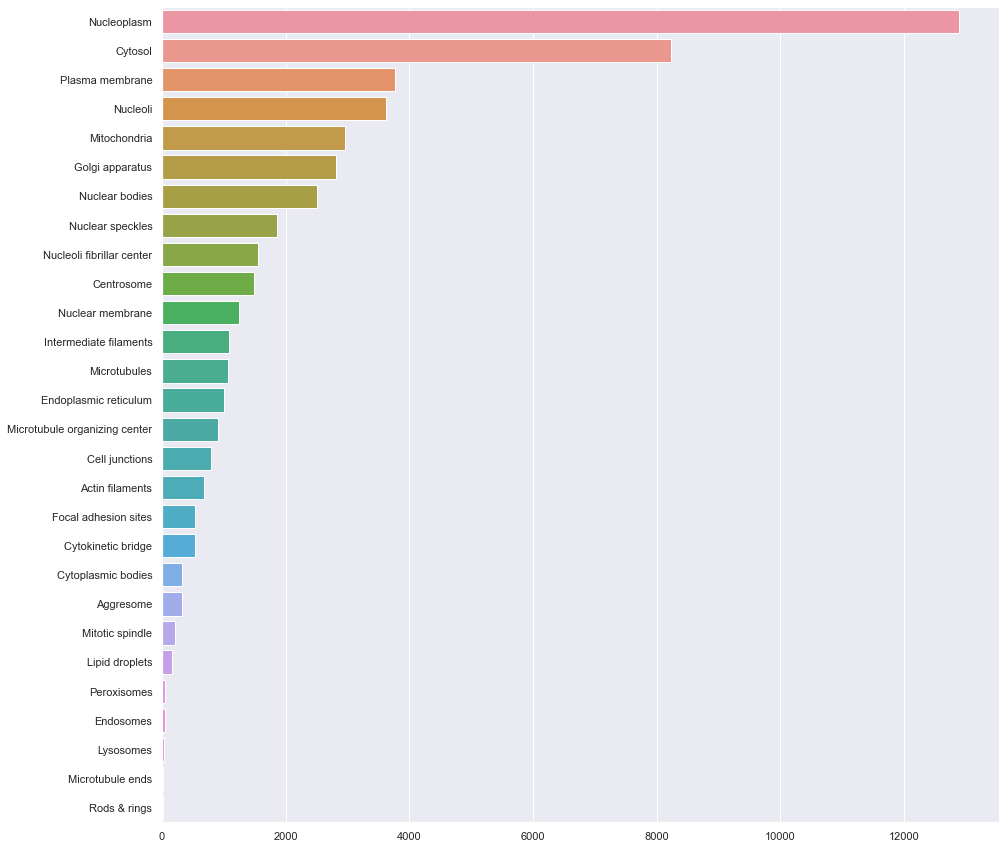

In [16]:
# add up all the 1's in each column and sort the resulting vector to plot protein and count
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

#### Notes:
- The data is very unevenly distributed, with most of the data falling into 2 to 4 protein types. 
- Most proteins have hardly any representation < about 1000 samples

### Number of proteins per picture

Text(0, 0.5, '% of train data')

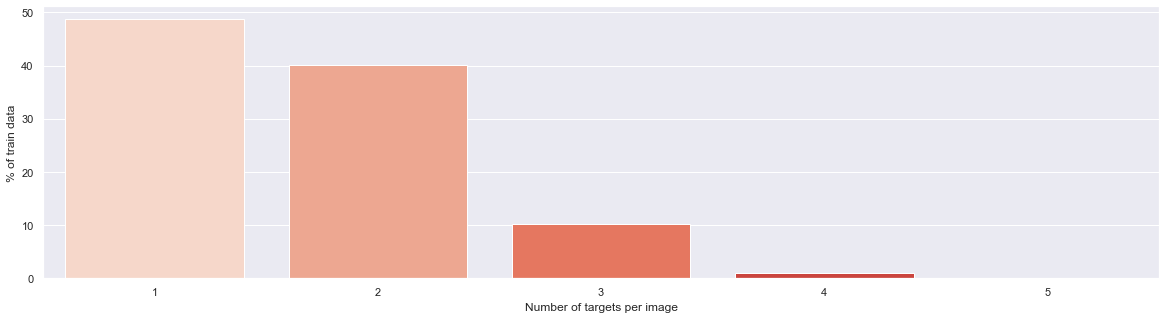

In [17]:
# sum again, but this time along the other axis to see how many 1s in each row, to get counts
train_labels["number_of_targets"] = train_labels.drop(["Id", "Target"],axis=1).sum(axis=1)
# convert to percent
count_perc = np.round(100 * train_labels["number_of_targets"].value_counts() / train_labels.shape[0], 2)
plt.figure(figsize=(20,5))
sns.barplot(x=count_perc.index.values, y=count_perc.values, palette="Reds")
plt.xlabel("Number of targets per image")
plt.ylabel("% of train data")

#### Notes:
- almost half the images contain 1 protein, and 40% 2 protetins
- so the remainder make up just over 10%


### Correlations

<AxesSubplot:>

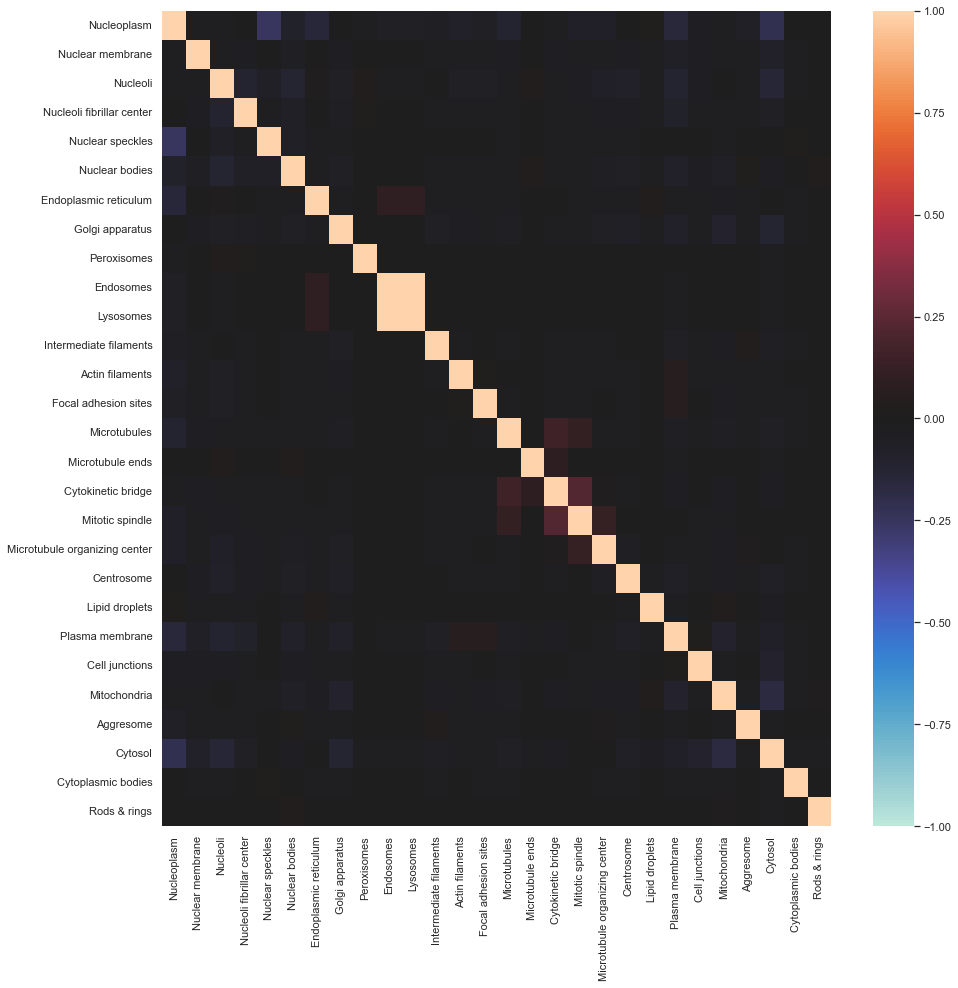

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(train_labels[train_labels.number_of_targets>1].drop(
    ["Id", "Target", "number_of_targets"],axis=1
).corr(), cmap="icefire", vmin=-1, vmax=1)

#### Notes:
- when only considering correlations > 0.5, the only clear correlation is between Endosomes and Lysosomes.
- maybe there is something going on between Microtubules through to Microtubule organizing center; based the name these may all be related in some way.

### Many images contain multiple targets


In [25]:
edoretic_endo_counts.index.values[-5:]

array(['Intermediate filaments', 'Nuclear speckles', 'Cell junctions',
       'Focal adhesion sites', 'Actin filaments'], dtype=object)

Text(0, 0.5, 'Counts in train data')

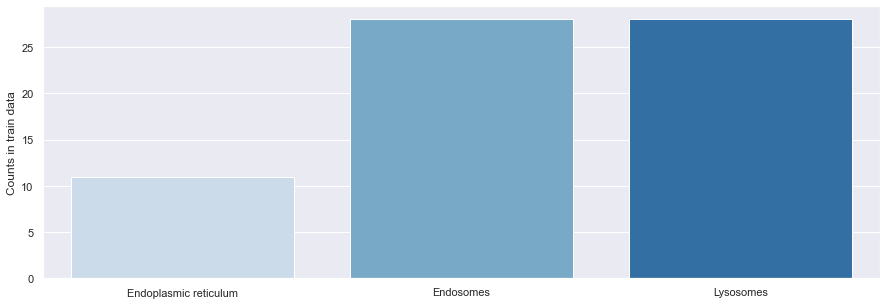

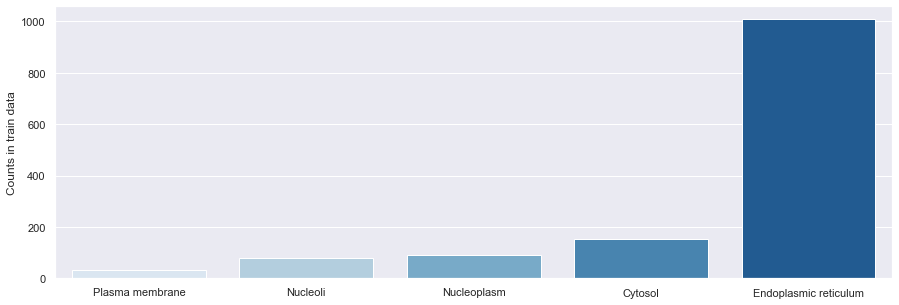

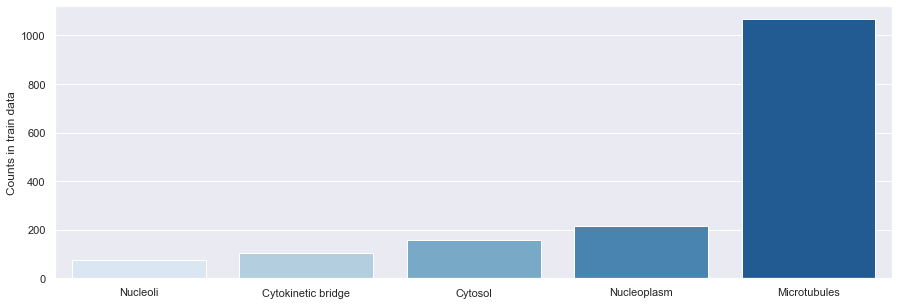

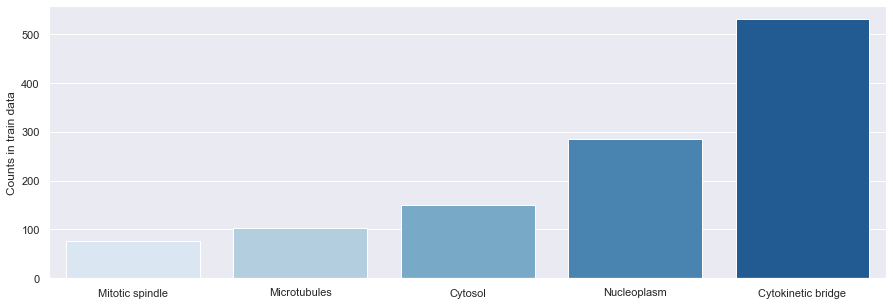

In [29]:
# for the given protein, count the number of times it is found with another protein (multi-target-label)
def find_counts(special_target, labels):
    counts = labels[labels[special_target] == 1].drop(
        ["Id", "Target", "number_of_targets"],axis=1
    ).sum(axis=0)
    counts = counts[counts > 0]
    counts = counts.sort_values()
    return counts

lyso_endo_counts = find_counts("Lysosomes", train_labels)
microtub_counts = find_counts("Microtubules", train_labels)
cytokin_counts = find_counts("Cytokinetic bridge", train_labels)
edoretic_counts = find_counts("Endoplasmic reticulum", train_labels)

plt.figure(figsize=(15,5))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues");
plt.ylabel("Counts in train data")
plt.figure(figsize=(15,5))
sns.barplot(x=edoretic_counts.index.values[-5:], y=edoretic_counts.values[-5:], palette="Blues");
plt.ylabel("Counts in train data")
plt.figure(figsize=(15,5))
sns.barplot(x=microtub_endo_counts.index.values[-5:], y=microtub_endo_counts.values[-5:], palette="Blues");
plt.ylabel("Counts in train data")
plt.figure(figsize=(15,5))
sns.barplot(x=edoretic_counts.index.values[-5:], y=edoretic_counts.values[-5:], palette="Blues");
plt.ylabel("Counts in train data")

#### Notes:
- only the endosomes-lysosomes (maybe endoplascmic reticulum) show real clustering in images. 
- the others may appear most often with Cytosol and Nucleoplasm, but there is no apparent correlation
- there is some relation between Microtubules and Cytokinetic bridge, and maybe Mitotic spindle
- as suggested here (https://www.kaggle.com/code/allunia/protein-atlas-exploration-and-baseline) these groupings may allow us to focus on the infrequent proteins ...

- for further investigation see: https://www.kaggle.com/code/allunia/uncover-target-correlations-with-bernoulli-mixture?scriptVersionId=8804538



### Looking at most frequent and least frequent protein

Text(0, 0.5, 'Counts in train data')

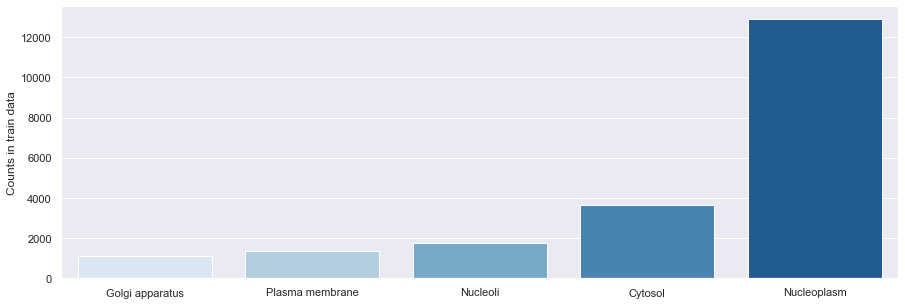

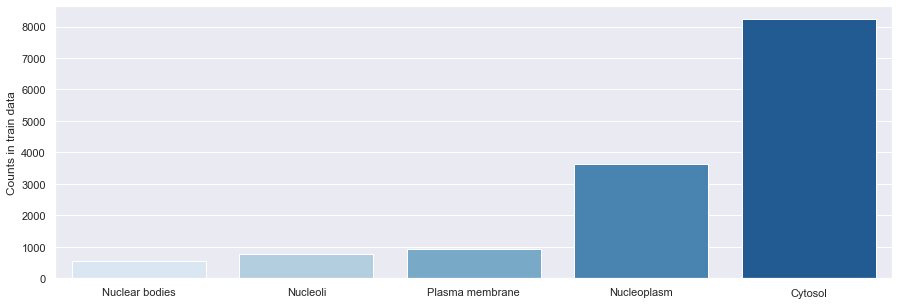

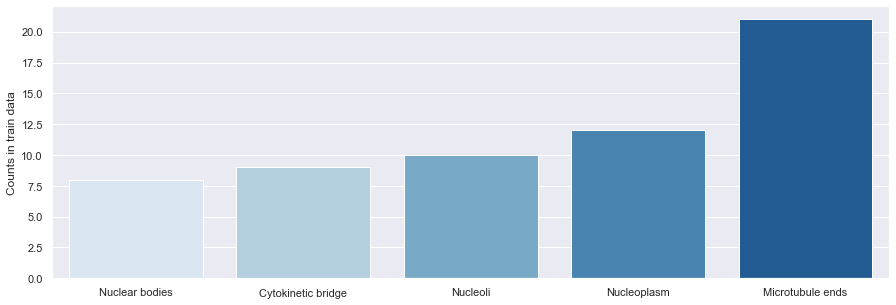

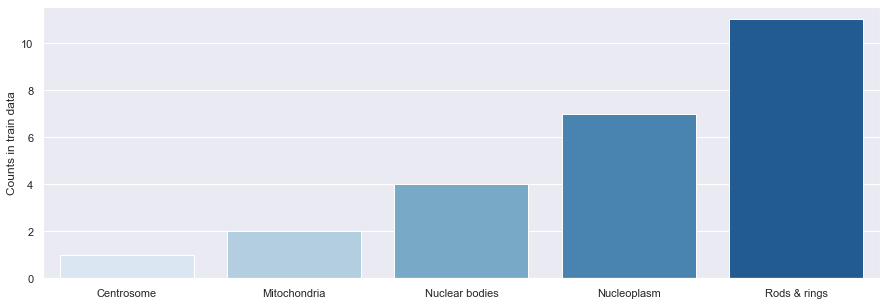

In [31]:
nucleo_counts = find_counts("Nucleoplasm", train_labels)
cytosol_counts = find_counts("Cytosol", train_labels)
microends_counts = find_counts("Microtubule ends", train_labels)
rodsrings_counts = find_counts("Rods & rings", train_labels)

plt.figure(figsize=(15,5))
sns.barplot(x=nucleo_counts.index.values[-5:], y=nucleo_counts.values[-5:], palette="Blues");
plt.ylabel("Counts in train data")
plt.figure(figsize=(15,5))
sns.barplot(x=cytosol_counts.index.values[-5:], y=cytosol_counts.values[-5:], palette="Blues");
plt.ylabel("Counts in train data")
plt.figure(figsize=(15,5))
sns.barplot(x=microends_counts.index.values[-5:], y=microends_counts.values[-5:], palette="Blues");
plt.ylabel("Counts in train data")
plt.figure(figsize=(15,5))
sns.barplot(x=rodsrings_counts.index.values[-5:], y=rodsrings_counts.values[-5:], palette="Blues");
plt.ylabel("Counts in train data")


#### Notes:
- Nucleoplasm may never be alone, seems linked to all others, but maybe its just because it is so numerous
- Even Cytosol and Nucleoplasm occur together a lot (25-30% of the time)

### Plotting some images

In [226]:
def load_image(basepath, image_id):
    # load all 4 colors in directory "basepath" with filename "image_id"
    # combine the arrays of each color into one 4x array
    images = np.zeros(shape=(7,512,512))
    images[0,:,:] = img.imread(basepath + image_id + "_green" + ".png")
    images[1,:,:] = img.imread(basepath + image_id + "_red" + ".png")
    images[2,:,:] = img.imread(basepath + image_id + "_blue" + ".png")
    images[3,:,:] = img.imread(basepath + image_id + "_yellow" + ".png")

    rgb = np.stack((
        images[0,:,:]/2 + images[3,:,:]/2, 
        images[1,:,:]/2 + images[3,:,:]/2, 
        images[2,:,:]),-1)
    rgb = cv2.resize(rgb, (images.shape[1], images.shape[2])) 
    #rgb = cv2.merge(rgb)
    images[4:7,:,:] = (rgb.transpose([2,1,0])) #*255).astype(np.int) #np.divide(rgb.transpose([2,1,0]), 255)
        
    return images

def make_image_row(image, subax, title):
    # plot on one row, all 4 colors
    subax[0].imshow(image[0], cmap="Greens")
    subax[1].imshow(image[1], cmap="Reds")
    subax[1].set_title("stained microtubules")
    subax[2].imshow(image[2], cmap="Blues")
    subax[2].set_title("stained nucleus")
    subax[3].imshow(image[3], cmap="Oranges")
    subax[3].set_title("stained endoplasmatic reticulum")
    subax[4].imshow(image[4:7].transpose([2,1,0]))#, cmap="Oranges")
    subax[4].set_title("Combined")
    subax[0].set_title(title)
    return subax

def make_title(file_id):
    # make an image title the target value
    file_targets = train_labels.loc[train_labels.Id==file_id, "Target"].values[0]
    title = " - "
    for n in file_targets:
        title += label_names[n] + " - "
    return title

class TargetGroupIterator:
    
    def __init__(self, target_names, batch_size, basepath):
        self.target_names = target_names
        self.target_list = [reverse_train_labels[key] for key in target_names]
        self.batch_shape = (batch_size, 7, 512, 512)
        self.basepath = basepath
    
    def find_matching_data_entries(self):
        train_labels["check_col"] = train_labels.Target.apply(
            lambda l: self.check_subset(l)
        )
        self.images_identifier = train_labels[train_labels.check_col==1].Id.values
        train_labels.drop("check_col", axis=1, inplace=True)
    
    def check_subset(self, targets):
        return np.where(set(self.target_list).issubset(set(targets)), 1, 0)
    
    def get_loader(self):
        filenames = []
        idx = 0
        images = np.zeros(self.batch_shape)
        for image_id in self.images_identifier:
            images[idx,:,:,:] = load_image(self.basepath, image_id)
            filenames.append(image_id)
            idx += 1
            if idx == self.batch_shape[0]:
                yield filenames, images
                filenames = []
                images = np.zeros(self.batch_shape)
                idx = 0
        if idx > 0:
            yield filenames, images
            

In [227]:
train_path = "../data/train/"
your_choice = ["Lysosomes", "Endosomes"]
your_batch_size = 10
imageloader = TargetGroupIterator(your_choice, your_batch_size, train_path)
imageloader.find_matching_data_entries()
iterator = imageloader.get_loader()

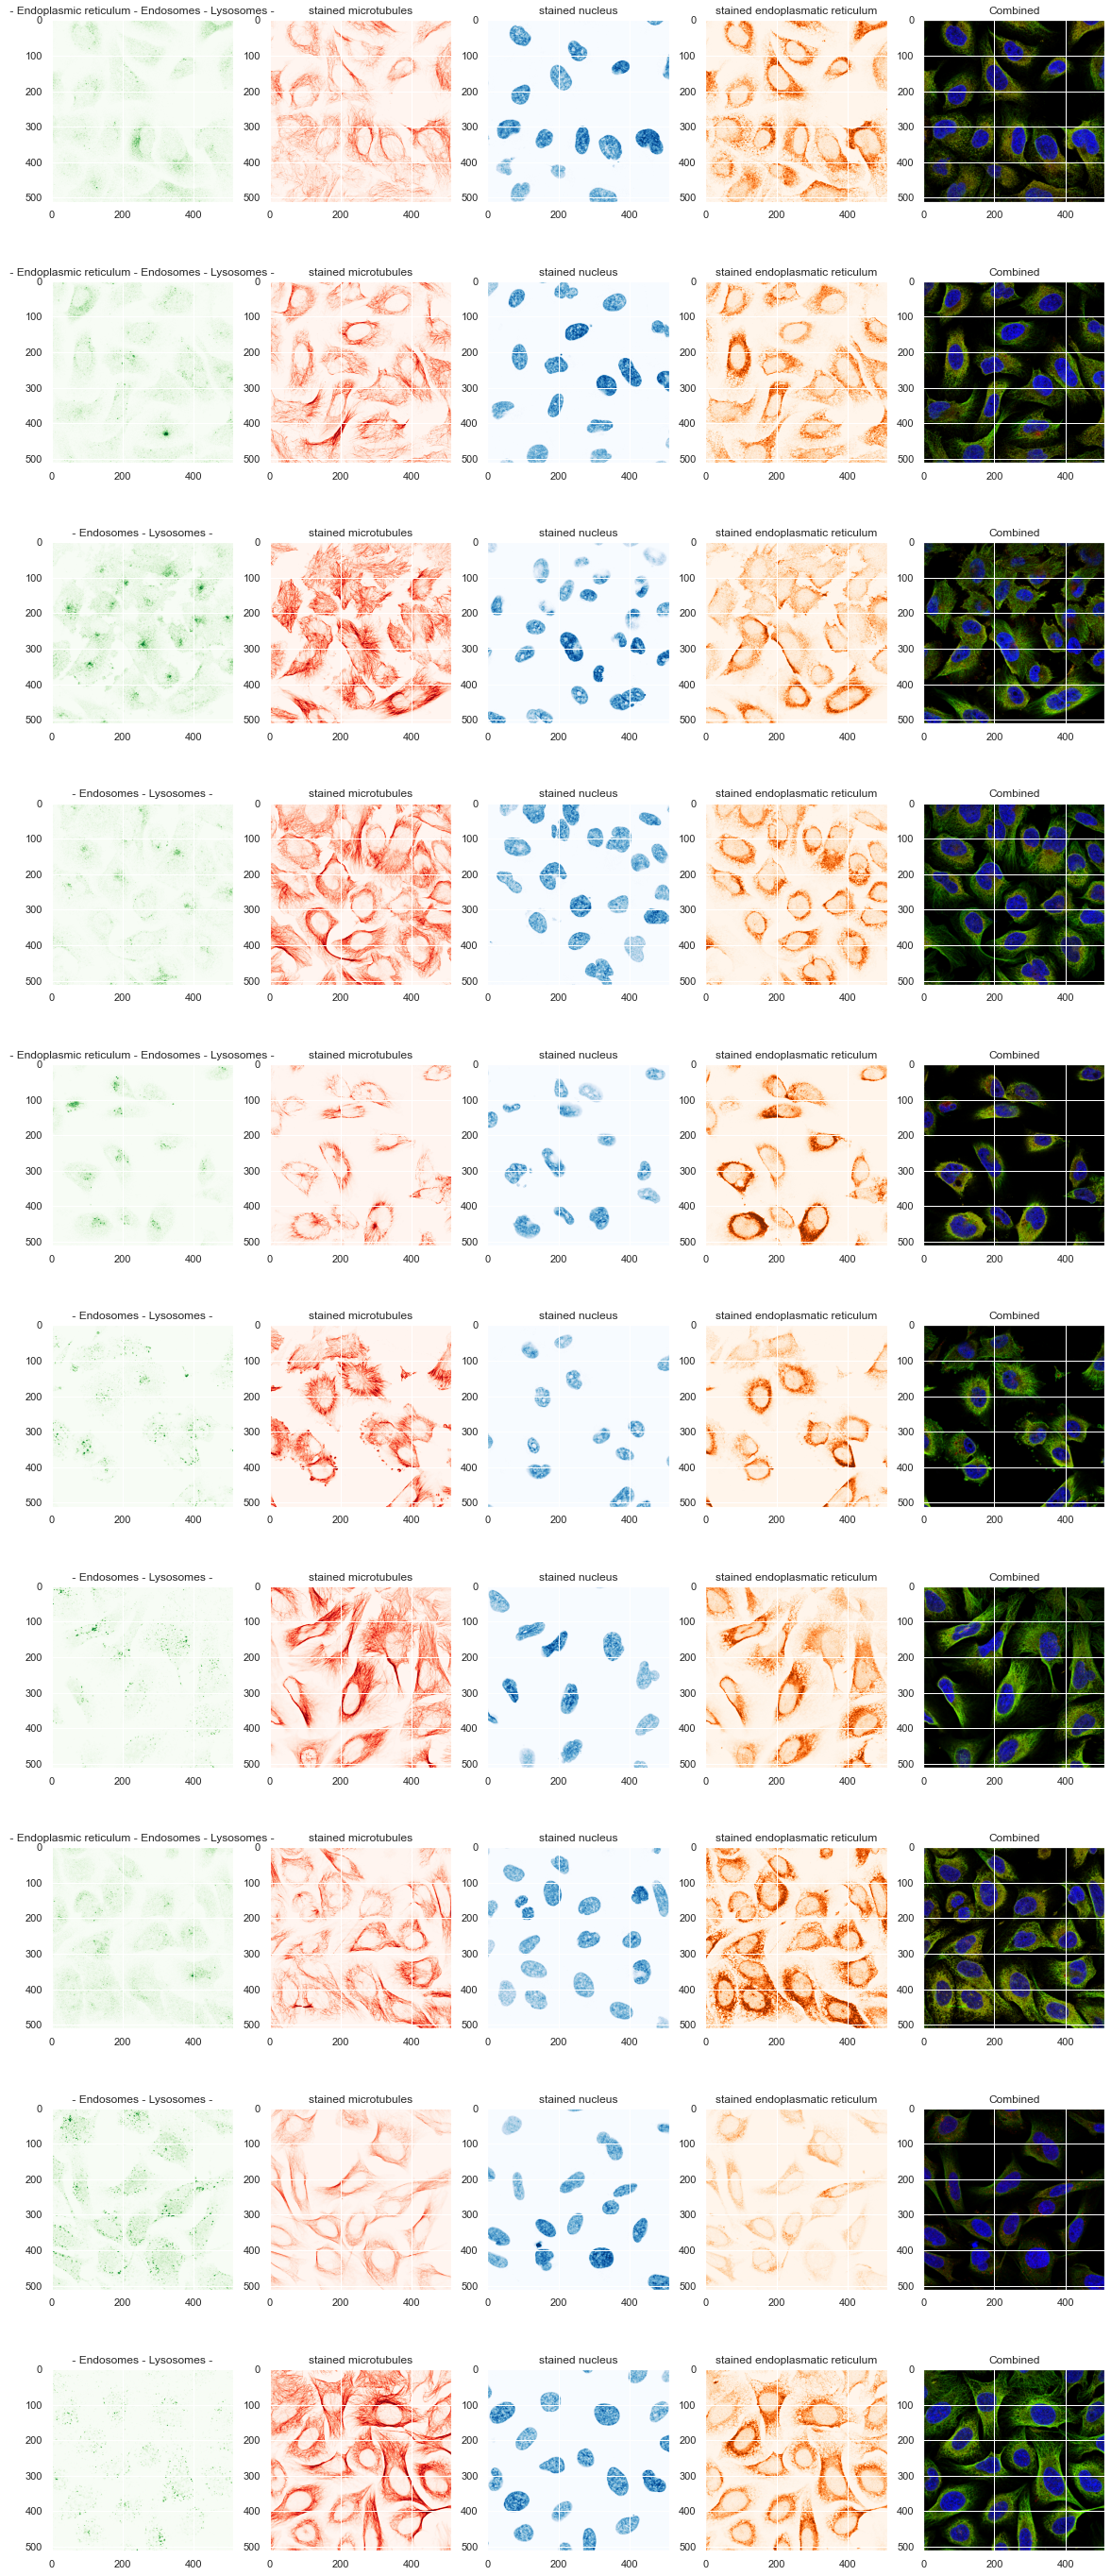

In [228]:
file_ids, images = next(iterator)

fig, ax = plt.subplots(len(file_ids),5,figsize=(20,5*len(file_ids)))
if ax.shape == (5,):
    ax = ax.reshape(1,-1)
for n in range(len(file_ids)):
    make_image_row(images[n], ax[n], make_title(file_ids[n]))